#                                      **TITANIC PROJECT**

This is a walktrough of the steps i took solving the Titanic data set. The objective of this project is to predict correctly who survived and did not survive the wreckage. In this notebook, 82.86% is the best score on the training set using Logistic regression.

**Below is an overview of the steps taken**
1. Data exploration
2. Data cleaning
3. Relationship between variables (INCLUDING SOME FEATURE ENGINEEERING)
4. Feature engineering
5. Data preprocessing
6. Model development and comparisms
7. Results
8. Submission

The cell below imports the numpy and pandas library along with our datasets.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **Data exploration**

Lets read our training data and have a look at the first 10 rows. The aim here is to have a proper idea of the type data contained in each column

In [2]:
df=pd.read_csv('/kaggle/input/titanic/train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Lets have a look at the mean, maximum and minimum values of columns with numerical data.

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the cells above there are some missing/null values in the 'Cabin','Age' and 'EMbarked' column (from their count), lets have a look at the number of null values in all columns. lets also have a look at the shape of our training set.

In [4]:
l=df.isnull().sum()
print(l , df.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 (891, 12)


We can now see the number of missing values in the 'Age', 'Cabin' and 'Embarked' column, later on we would do some imputations to handle them.

The cell below is used to check the degree of correlation between columns., note that each column is expected to be perfectly corrolated with itself and the only other columns with the most correlation are the 'SipSp' (sibling to parent ratio), and 'Parch' (parent to children ratio) columns.

<AxesSubplot:>

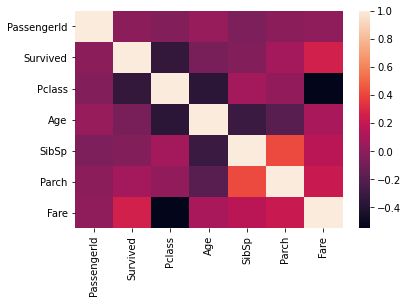

In [5]:
import seaborn as sns
sns.heatmap(df.corr())

# **DATA CLEANING**

Let's have a look at where we have null values.

In [6]:
d=df.isnull().sum()
d

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have a large number of null values, so dropping them would not be a smart move as than would mean loosing over half of our data. Hence we would be doing some imputation.

For the Age column we would be imputing randum numbers between the 'mean - standard deviation' of the ages and 'mean + standard deviation' of the ages in the cell below.

In [7]:

test_data=pd.read_csv('/kaggle/input/titanic/test.csv')
data = [df, test_data]
for dataset in data:
    mean = df["Age"].mean()
    std = test_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = dataset["Age"].astype(int)

Let's have a look at how many unique values we have in the embarked column.

In [8]:
df.Embarked.value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

Now let's have a look at the position of the null values.

In [9]:
for i,j in enumerate(df.Embarked):
    if j=="nan":
        print(i,j)

In [10]:
df.iloc[[61,829]]['Embarked']

61     NaN
829    NaN
Name: Embarked, dtype: object

Now that we have the index of the 'nan' values, we can input the value with the highest frequency, which is 'S'

In [11]:
df.Embarked[61]='S'
df.Embarked[829]='S'
df.Embarked.value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


S    646
C    168
Q     77
Name: Embarked, dtype: int64

Let's check if our imputation was a success

In [12]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

# **Relationship between variables**

Relationship between variables refers to the relationsship between the dependent variable ('Survived' column) and the independent variable (other columns).
let's first have a look at the survival rate using seaborne.


survival rate using seabornes.

<AxesSubplot:xlabel='Survived', ylabel='count'>

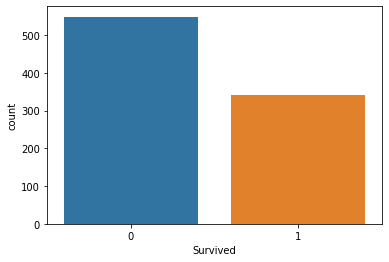

In [13]:
sns.countplot(data=df, x='Survived')

From the plot above it's clear that more poeple died than survived, over 500 passengers died while less than 400 survived. lets have a look at how the 
independent variables (sex, age, embarhed, fare, Pclass etc) are related to the survival rate. We would be starting with sex.

<AxesSubplot:xlabel='Sex', ylabel='count'>

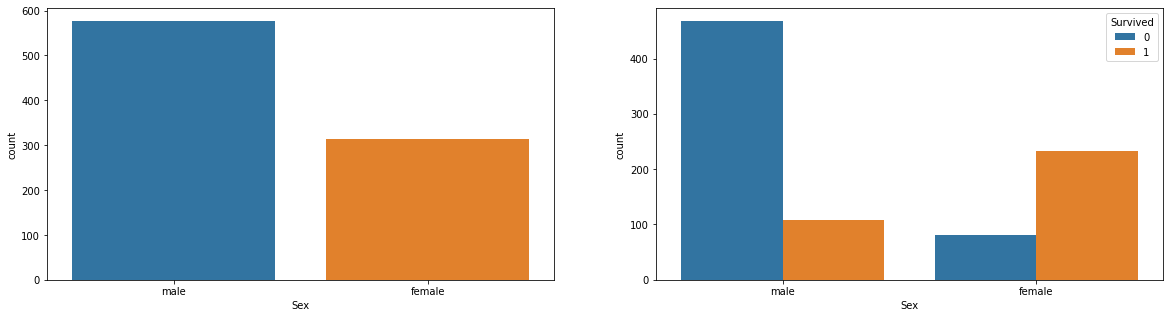

In [14]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.countplot(ax=axes[0], data=df,x='Sex')
sns.countplot(ax=axes[1],data=df,x='Sex',hue='Survived')

The plot above shows the survival rate with respect to sex. The plot on the left shows the total number of males and females that boarded the ship while the one on the right shows the amount of males and females that survived or not. Less than 110 (20 percent) of the males on the ship survived while over 200 (70 percent) of the females survived. Hence a female has a higher chance of survival (4 times more) than a male. we can go ahead to check the survival rate with respect to the point of embarkment.


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

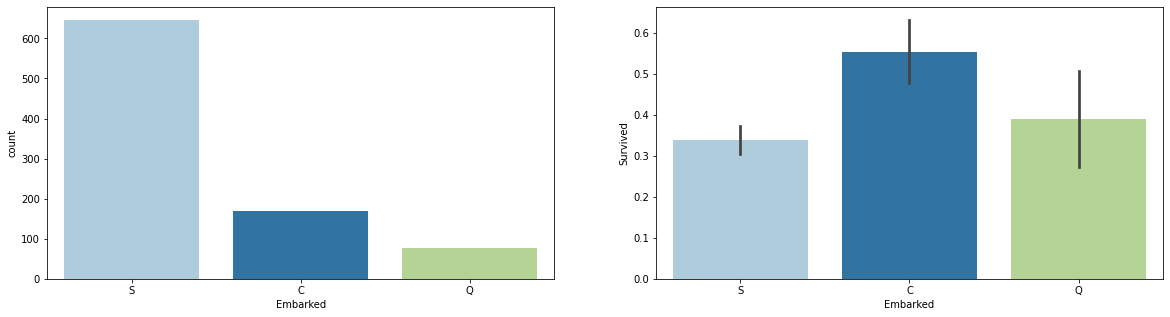

In [15]:
sns.set_palette('Paired')
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.countplot(ax=axes[0], data=df,x='Embarked')
sns.barplot(ax=axes[1],data=df, x= 'Embarked', y='Survived')


The plot on the left shows the total number of passengers that embarked from fifferent points, while 'nan' stands for those passengers whose point of embarkment was not recorded, while that on the right represents the percentage of passengers that survived from each point of embarkment.
From the barplot it is evident that passengers that embarked at 'C' had a higher chance of survival, about 55% of them survived while less than 40% of the passengers that embarked at 'S' and 'C' survived with 'S' having the lowest survival rate (note that very few passengers had their point of embarkment not recorded and they all survived). Below is a look at the survival rate of men and women with respect to where they embarked.



<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

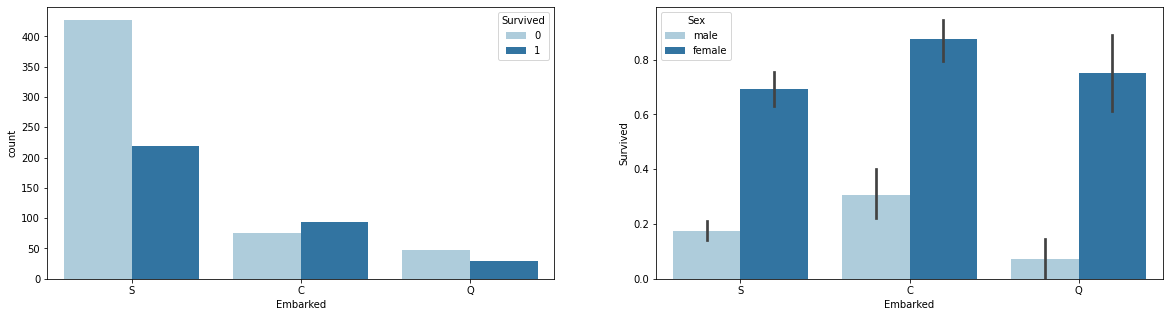

In [16]:
sns.set_palette('Paired')
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.countplot(ax=axes[0], data=df,x='Embarked', hue='Survived')
sns.barplot(ax=axes[1],data=df, x= 'Embarked', y='Survived', hue='Sex')

The plot above shows that more females that embarked from each category survived. Let's go ahead and check survival rate with respectc to a passengers class (Pclass). 




<AxesSubplot:xlabel='Sex', ylabel='Survived'>

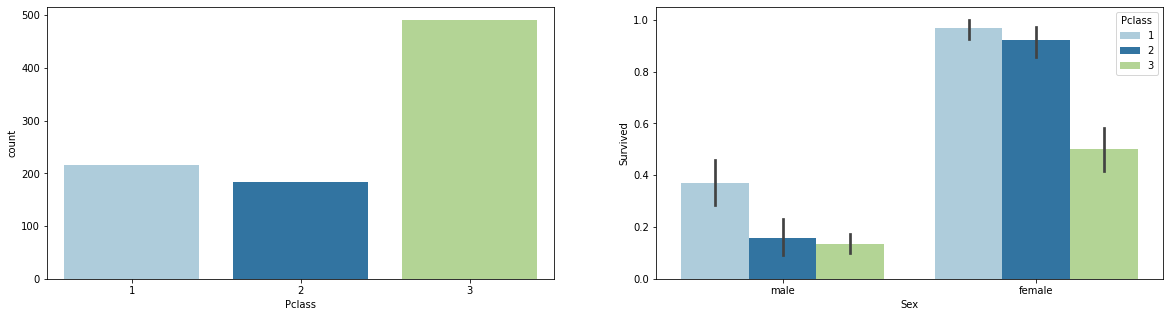

In [17]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.countplot(ax=axes[0], data=df,x='Pclass')
sns.barplot(ax=axes[1], data=df,x='Sex',y='Survived', hue="Pclass")

From the plots it is evident that more passengers were in the passenger class '3' while the least amount of passengers were in class '2'. Conversly male and female passengers in passenger class '3' had the lowest chance of survival while those in class '1' had the highest chance of survival. UP next we would be checking the survival rate by age.


Knowing we have iver 800 passengers, below is the age disribution of our passengers. Majority ofthe passengers fall within the ages of 15 to40 years.



<AxesSubplot:xlabel='Age', ylabel='Count'>

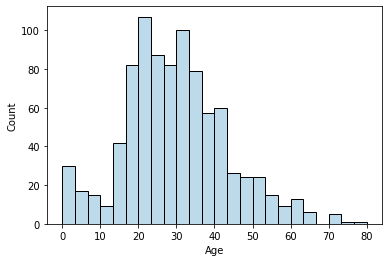

In [18]:
sns.histplot(data=df,x='Age')

Let's have a look at how many unique (different) ages are distributed amongst the passengers. 



In [19]:
df.Age.nunique()

71

If we are to plot the relationship between age and survival, we would have a cluttered graph due to a large number of different values for the fares. Hence we would be spltting the fares into fare groups in a new column. Now we create a column where we group the ages in groups of 10 and sort them for ease of plotting a clear graph showing the survival rate with respect to age and sex.




<AxesSubplot:xlabel='age_group', ylabel='Survived'>

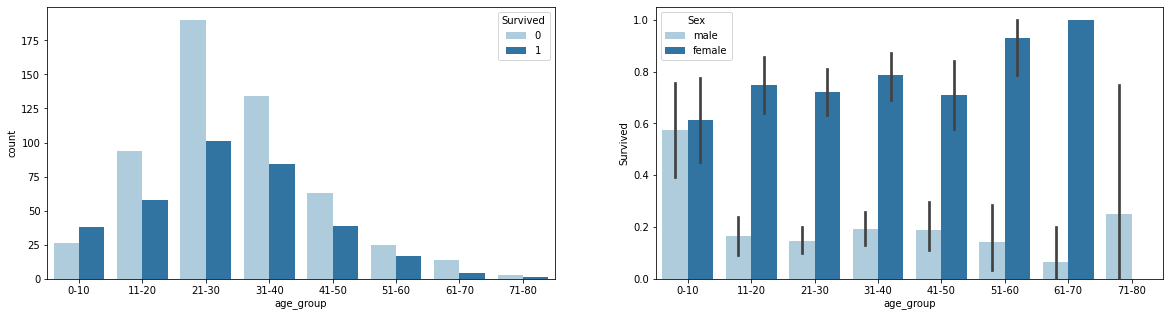

In [20]:
Age_group=[]
for c in df.Age:
    if c<11:
        Age_group.append("0-10")
    elif 10<c<21:
        Age_group.append("11-20")
    elif 20<c<31:
        Age_group.append("21-30")
    elif 30<c<41:
        Age_group.append("31-40")
    elif 40<c<51:
        Age_group.append("41-50")
    elif 50<c<61:
        Age_group.append("51-60")
    elif 60<c<71:
        Age_group.append("61-70")
    else:
        Age_group.append("71-80")      
 
df['age_group']=Age_group


fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.set_palette('Paired')
df1=df.sort_values('Age', ascending=True)
sns.countplot(ax=axes[0], data=df1,x='age_group', hue="Survived")
sns.barplot(ax=axes[1], x='age_group', hue='Sex', data=df1, y='Survived')

From the graph on the left we can see that most of the passengers that survived were within the age group of 21-30 years while those within 61-70 were the most few that survived. From the graph on the right, males with the ages of 0-10 years had almost the same chance of survival as the females in the same age group and that is the age group among males with the highest chance of survival. The graph below gives us a clearer view of the age group with the highest chance of survival within males and females.



<AxesSubplot:xlabel='Sex', ylabel='Survived'>

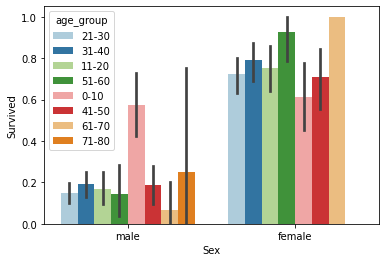

In [21]:
sns.barplot(data=df, x='Sex',hue='age_group',  y='Survived')

The graph below shows the rate of survival with respect to SibSp (sibling to parent ratio), passengers with 0 and 1 'SibSP' have the highest chance of survival while those with 6 and 8 have the lowest chance of survival (0 chance of survival).

<AxesSubplot:xlabel='SibSp', ylabel='count'>

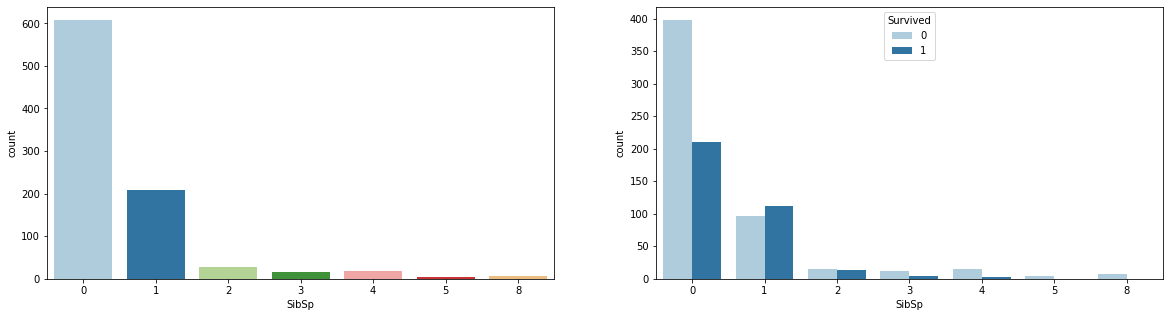

In [22]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.countplot(ax=axes[0], data=df,x='SibSp')
sns.countplot(data=df, x='SibSp', hue='Survived')#, dodge=False)

<AxesSubplot:xlabel='Parch', ylabel='count'>

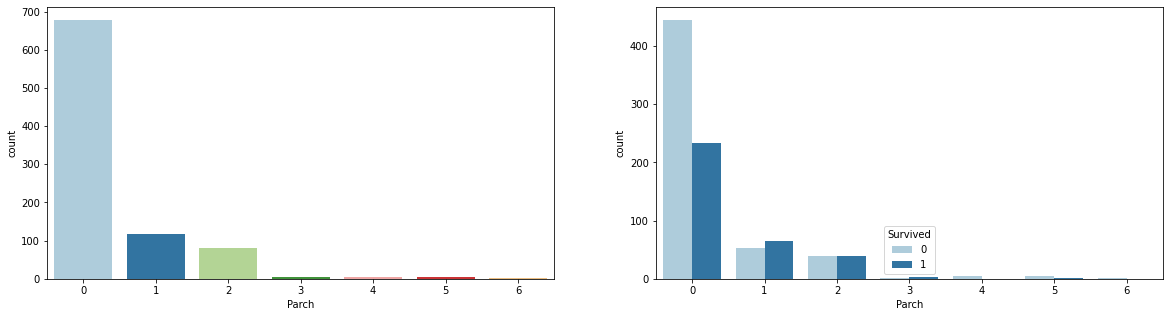

In [23]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.countplot(ax=axes[0], data=df,x='Parch')
sns.countplot(data=df, x='Parch', hue='Survived')#, dodge=False)

Next is the 'Cabin', let's have a look at how many cabins we have below.

In [24]:
df.Cabin.nunique()

147

Making a countplot for the cabins is not the best ideas as seen below. The graph is not interpretable due to the large number of cabins, later on we would be doing some featyre engineering to get a better idea of the relationship between 'Cabin' and 'Survival'. 

<AxesSubplot:xlabel='Cabin', ylabel='count'>

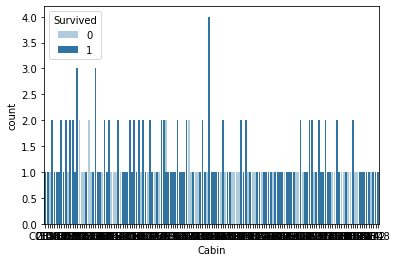

In [25]:
plt.figsize=(50,10)
sns.countplot(data=df, x='Cabin', hue='Survived', dodge=False)


If we are to plot the relationship between fares and survival, we qould have a similar graph to the one above due to a large number of different values for the fares. Hence we would be spltting the fares into fare groups in a new column.

In [26]:
fare_group=[]
for c in df.Fare:
    if c<11:
        fare_group.append("0-10")
    elif 10<c<21:
        fare_group.append("11-20")
    elif 20<c<31:
        fare_group.append("21-30")
    elif 30<c<41:
        fare_group.append("31-40")
    elif 40<c<51:
        fare_group.append("41-50")
    elif 50<c<101:
        fare_group.append("50-100")
    elif 100<c<201:
        fare_group.append("101-200")
    elif 200<c<301:
        fare_group.append("201-300")
    elif 300<c<401:
        fare_group.append("301-400")
    elif 400<c<501:
        fare_group.append("401-500")
    else:
        fare_group.append("501-550")      
 
df['Fare_group']=fare_group
df['Fare_group'].value_counts()

0-10       364
11-20      160
21-30      142
50-100     106
31-40       50
101-200     33
201-300     17
41-50       16
501-550      3
Name: Fare_group, dtype: int64

The output cell above shows the count for each fare group, now we can go ahead and sort the fare_group column then plot graphs using the fare_group colums

<AxesSubplot:xlabel='Fare_group', ylabel='count'>

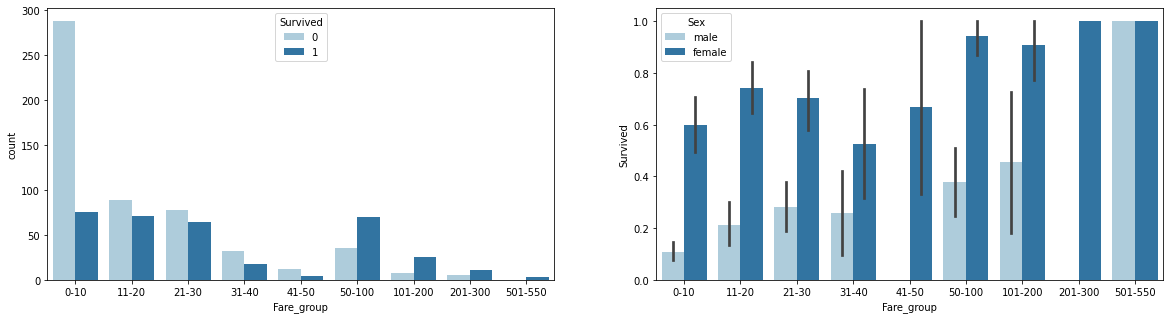

In [27]:
df2=df.sort_values('Fare', ascending=True)
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.barplot(ax=axes[1], x='Fare_group', hue='Sex', data=df2, y='Survived')
sns.countplot(ax=axes[0],data=df2, x='Fare_group', hue='Survived')


From the graphs above, there were more passengers who paid between 0$ to 10$ and females had a higher survival rate in each fare group apart from those that paid 501$ to 550$ where everyone survived.

# **FEATURE ENGINEERING**

In this section we would be trying to develop some features (columns) from the existing features (columns).

Starting with the 'Cabin' column where we have a lot of missing values we can take the first letter of each cabin number and use that as a cabin class/group, while the 'nan' values are taken as a seperate group thereby leaving us with no missing values.

<AxesSubplot:xlabel='cabin_adv', ylabel='count'>

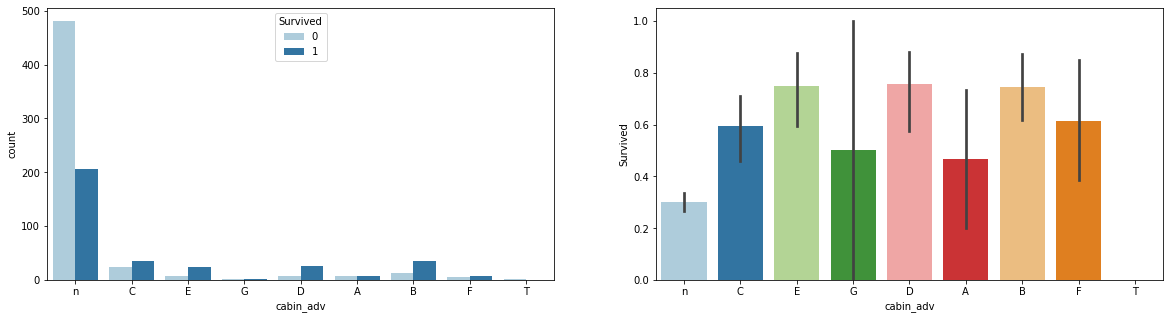

In [28]:
df['cabin_adv'] = df.Cabin.apply(lambda x: str(x)[0]) # we use the 'str' method to strip the cabin number abd take only the first character.
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.barplot(ax=axes[1], x='cabin_adv', data=df, y='Survived')
sns.countplot(ax=axes[0],data=df, x='cabin_adv', hue='Survived')#, dodge=False)



We can also extract the title of each passenger from their names and create a seperate column for than. Let have a look at how the names are arraned first.

In [29]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,Fare_group,cabin_adv
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,21-30,0-10,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,31-40,50-100,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,21-30,0-10,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,31-40,50-100,C
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,31-40,0-10,n
5,6,0,3,"Moran, Mr. James",male,17,0,0,330877,8.4583,NaN,Q,11-20,0-10,n
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,51-60,50-100,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,0-10,21-30,n
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,21-30,11-20,n
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,11-20,21-30,n


The names are in the format of Name/Tittle/Other Names. Hence we split the names at the 'comma' after the name at the first position and pick the tittle, then we split the tittle of the 'full stop' at its end and take the tittle alon as in the first line of the cell below.

Let's have a table showing the tittle and their survival. (nan represents 0)

In [30]:
df['tittle'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
pd.pivot_table(df,index='Survived',columns='tittle', values = 'Ticket', aggfunc='count')

tittle,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


Cheching for null values in our dataset we can see that there are no null values excpt in the 'Cabin' column.

In [31]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
age_group        0
Fare_group       0
cabin_adv        0
tittle           0
dtype: int64

# **MODEL PREPROCESSING**

SPlitting our data set into dependent and independent variables while exluding Passenger Id and Names we have.

In [32]:
features=[ 'Pclass','Sex','Age', 'age_group', 'SibSp',
       'Parch', 'Embarked','Fare','Fare_group', 'cabin_adv', 'tittle']
y=df.Survived
train_data=df[features]

In [33]:
train_data.columns

Index(['Pclass', 'Sex', 'Age', 'age_group', 'SibSp', 'Parch', 'Embarked',
       'Fare', 'Fare_group', 'cabin_adv', 'tittle'],
      dtype='object')

we would be training our model using two types of our training set, one which makes used of the age_group and fare_group columns and another which makes use of the Age and Fare column when normalized. For that we would we would be making usse of 'train_data' with 'Age' and 'Fare' columns dropped and 'Train' with 'Age' and 'Fare' column which we would normalize soon.

In [34]:
train=train_data[features]
train_data.drop(['Age','Fare'], axis=1)

,Pclass,Sex,age_group,SibSp,Parch,Embarked,Fare_group,cabin_adv,tittle
0,3,male,21-30,1,0,S,0-10,n,Mr
1,1,female,31-40,1,0,C,50-100,C,Mrs
2,3,female,21-30,0,0,S,0-10,n,Miss
3,1,female,31-40,1,0,S,50-100,C,Mrs
4,3,male,31-40,0,0,S,0-10,n,Mr
...,...,...,...,...,...,...,...,...,...
886,2,male,21-30,0,0,S,11-20,n,Rev
887,1,female,11-20,0,0,S,21-30,B,Miss
888,3,female,31-40,1,2,S,21-30,n,Miss
889,1,male,21-30,0,0,C,21-30,C,Mr


Lets get dummy variable for 'train_data'

In [35]:
X=pd.get_dummies(train_data)

Let's normalize our 'train'. Normalozation simply means to scale our values within 0 and 1 or -1 and +1, this is done so our models will be more sensitive to slight changes. From the output cells below we can see that ur normalized columns have maximum and minimum values of 1 and 0.

In [36]:
def normalize_input(x):
    normalized = (x-min(x))/(max(x)-min(x))
    return normalized
normalized_age=normalize_input(train.Age)
normalized_fare=normalize_input(train.Fare)
train['normalized_age']=normalized_age
train['normalized_fare']=normalized_fare
train.drop(['Age','Fare'], axis=1)
normalized_features=['Pclass','SibSp','Parch','normalized_age','normalized_fare','cabin_adv', 'tittle','Sex','Embarked']
normalized_train=train[normalized_features]
normalized_train_dummies=pd.get_dummies(normalized_train)

from sklearn.model_selection import train_test_split

normalized_X_train, normalized_X_test, yy_train, yy_test = train_test_split(normalized_train_dummies,y,test_size=0.2,random_state=10)
normalized_train.describe()

,Pclass,SibSp,Parch,normalized_age,normalized_fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.523008,0.381594,0.369753,0.062858
std,0.836071,1.102743,0.806057,0.169206,0.096995
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.262500,0.015440
50%,3.000000,0.000000,0.000000,0.350000,0.028213
75%,3.000000,1.000000,0.000000,0.468750,0.060508
max,3.000000,8.000000,6.000000,1.000000,1.000000


Time to import our models

In [37]:

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV



We are going to split our train/train_data into training and test set so we can evaluate the performance of our models before making predictions and submiting them.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)


# using KNN

In [39]:
#BEFORE NORMALOZATION
model = KNN(n_neighbors=7)
cv = cross_val_score(model,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.68531469 0.72027972 0.66901408 0.66901408 0.70422535]
0.6895695853442332


In [40]:
#AFTER NORMALOZATION
model = KNN(n_neighbors=7)
cv = cross_val_score(model,normalized_X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82517483 0.83916084 0.77464789 0.83802817 0.82394366]
0.8201910765291046


# Using Linear regression

In [41]:
#BEFORE NORMALOZATION
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
v=cross_val_score(LinearRegression(), X_train, y_train, cv=cv)
v.mean()

0.2903155014602742

In [42]:
#AFTER NORMALOZATION
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
v=cross_val_score(LinearRegression(), normalized_X_train, yy_train, cv=cv)
v.mean()

-3.623641264781553e+18

# Using logistic regression

In [43]:
#BEFORE NORMALOZATION
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82517483 0.83216783 0.74647887 0.81690141 0.81690141]
0.8075248694967005


In [44]:
#AFTER NORMALOZATION
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,normalized_X_train,yy_train,cv=5)
print(cv)
print(cv.mean())

[0.82517483 0.85314685 0.78873239 0.83802817 0.83098592]
0.8272136314389835


# Using Random forests

In [45]:
#BEFORE NORMALOZATION
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.7972028  0.76923077 0.73943662 0.82394366 0.79577465]
0.7851176992022062


In [46]:
#AFTER NORMALOZATION
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,normalized_X_train,yy_train,cv=5)
print(cv)
print(cv.mean())

[0.8041958  0.81118881 0.76056338 0.82394366 0.78169014]
0.7963163596966414


# Using Naive Bayes

In [47]:
#BEFORE NORMALOZATION
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.77622378 0.73426573 0.68309859 0.74647887 0.72535211]
0.7330838175908598


In [48]:
#AFTER NORMALOZATION
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
cv = cross_val_score(gnb,normalized_X_train,yy_train,cv=5)
print(cv)
print(cv.mean())

[0.77622378 0.72727273 0.69014085 0.78873239 0.66197183]
0.7288683147838078


# Using Support Vectors

In [49]:
#BEFORE NORMALOZATION
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.65734266 0.62937063 0.66901408 0.64788732 0.64788732]
0.6503004038215305


In [50]:
#AFTER NORMALOZATION
svc = SVC(probability = True)
cv = cross_val_score(svc,normalized_X_train,yy_train,cv=5)
print(cv)
print(cv.mean())

[0.82517483 0.83916084 0.79577465 0.83098592 0.84507042]
0.8272333300502315


# Using Extreme gradient bost

In [51]:
#BEFORE NORMALOZATION
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier obje

[16:37:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-pa

[16:37:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.7972028  0.78321678 0.76760563 0.81690141 0.8028169 ]
0.7935487048163106


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [52]:
#AFTER NORMALOZATION
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,normalized_X_train,yy_train,cv=5)
print(cv)
print(cv.mean())

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier obje

[16:37:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-pa

[16:37:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.77622378 0.78321678 0.76056338 0.8028169  0.78873239]
0.7823106470993795


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


From The outputs of our models we can infer that the models that used the normalized data performed better.
Logistic regression gave us our best score of 0.827 while linear regression gave our worse of -5.097. Thus we would be making a submission with logistic regression as ou model.
Lets prepare our submission file, we have to repeat all preprocessing steps on the test_data

Checking for null values, we find one in the Fare column

In [53]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We would be getting the index of the null value in the fare column and imouting the mean of all values in the fare column.

In [54]:
for i,j in enumerate(test_data.Fare):
    if np.isnan(j):
        test_data.Fare[i]=test_data.Fare.mean()
print(test_data.Fare[i])

22.3583


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


It's time for some feature engineering. We would be extracting the forst chracter of the cabin numbers and also extracting the tittles from the names of the passengers.

In [55]:
test_data['cabin_adv'] = test_data.Cabin.apply(lambda x: str(x)[0])
test_data['tittle'] = test_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

We have to normalize the Age and fare column as done on the training set. 

In [56]:
normalized_age=normalize_input(test_data.Age)
normalized_fare=normalize_input(test_data.Fare)
test_data['normalized_age']=normalized_age
test_data['normalized_fare']=normalized_fare
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_adv,tittle,normalized_age,normalized_fare
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q,n,Mr,0.447368,0.015282
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S,n,Mrs,0.618421,0.013663
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q,n,Mr,0.815789,0.018909
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S,n,Mr,0.355263,0.016908
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S,n,Mrs,0.289474,0.023984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,15,0,0,A.5. 3236,8.0500,NaN,S,n,Mr,0.197368,0.015713
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C105,C,C,Dona,0.513158,0.212559
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,n,Mr,0.500000,0.014151
416,1308,3,"Ware, Mr. Frederick",male,16,0,0,359309,8.0500,NaN,S,n,Mr,0.210526,0.015713


Getting our dummy variables

In [57]:
features=['Pclass','Sex','SibSp','Parch','Embarked','cabin_adv','tittle','normalized_age','normalized_fare']
test= pd.get_dummies(test_data[features])
test

,Pclass,SibSp,Parch,normalized_age,normalized_fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,cabin_adv_n,tittle_Col,tittle_Dona,tittle_Dr,tittle_Master,tittle_Miss,tittle_Mr,tittle_Mrs,tittle_Ms,tittle_Rev
0,3,0,0,0.447368,0.015282,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,3,1,0,0.618421,0.013663,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,2,0,0,0.815789,0.018909,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,3,0,0,0.355263,0.016908,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,3,1,1,0.289474,0.023984,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,0.197368,0.015713,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
414,1,0,0,0.513158,0.212559,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
415,3,0,0,0.500000,0.014151,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
416,3,0,0,0.210526,0.015713,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0


Let's try fitting our model ang getting predictions

In [58]:
model = LogisticRegression(max_iter = 2000)
model.fit(normalized_X_train,yy_train)
predictions=model.predict(test)


ValueError: X has 27 features per sample; expecting 36

From the error code above we have less features (columns) than our model expects. This means the training set we used to train our model has more columns that the test set we want to get predictions for. Let's see what columns are in our train set but not in out test set.

In [59]:
col=[]
for i in normalized_train_dummies.columns:
    if i not in test.columns:
        col.append(i)
col

['cabin_adv_T',
 'tittle_Capt',
 'tittle_Don',
 'tittle_Jonkheer',
 'tittle_Lady',
 'tittle_Major',
 'tittle_Mlle',
 'tittle_Mme',
 'tittle_Sir',
 'tittle_the Countess']

From the outputs above its clears that our test set has no cabin number starting witn a 'T' and does not have some tittles. We can go around this by creating dummy variables for those columns and filling them with zeros, this would fill our data set and not have side efffects.

In [60]:
for i in col:
    test[i]=[0]*418

In [61]:
test.columns

Index(['Pclass', 'SibSp', 'Parch', 'normalized_age', 'normalized_fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'cabin_adv_A', 'cabin_adv_B', 'cabin_adv_C', 'cabin_adv_D',
       'cabin_adv_E', 'cabin_adv_F', 'cabin_adv_G', 'cabin_adv_n',
       'tittle_Col', 'tittle_Dona', 'tittle_Dr', 'tittle_Master',
       'tittle_Miss', 'tittle_Mr', 'tittle_Mrs', 'tittle_Ms', 'tittle_Rev',
       'cabin_adv_T', 'tittle_Capt', 'tittle_Don', 'tittle_Jonkheer',
       'tittle_Lady', 'tittle_Major', 'tittle_Mlle', 'tittle_Mme',
       'tittle_Sir', 'tittle_the Countess'],
      dtype='object')

Now that we have filled our columns we should also check if our test set has columns that are not in out train set

In [62]:
col=[]
for i in test.columns:
    if i not in normalized_train_dummies.columns:
        col.append(i)
col

['tittle_Dona']

Our test set has a column which our train set does not have, we could go back to our train set and create that column or we could just drop this column from our test set. The later will be done in the next cell

In [63]:
test.drop('tittle_Dona', axis=1, inplace=True)

Finally we can fit our model and make predictions.

In [64]:
model = LogisticRegression(max_iter = 2000)
model.fit(normalized_X_train,yy_train)
predictions=model.predict(test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
